# Students stress survey dataset

In [1]:
import pandas as pd

# Specify the file path
filename=r'C:\Users\lora.maillard\OneDrive - De Vinci\Documents\ESILV\Informatique\S5\Data science\Final project\Student Stress Survey Jan2020 OPENDATA.xlsx'

# Read all sheets into a dictionary
all_sheets = pd.read_excel(filename, sheet_name=None)

# Access individual sheets using dictionary keys
sheet1_df = all_sheets['Questions']
sheet2_df = all_sheets['Data']
sheet3_df = all_sheets['Demographics']
sheet4_df = all_sheets['Q9StressLevels']
sheet5_df = all_sheets['Q11Coping']
sheet6_df = all_sheets['Q12Q13']
sheet7_df = all_sheets['Q17Stressors']
sheet2_df.head()

C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\U

,Survey responses anonymised,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
2,Gender,Ethnicity,Please state your age in years:,What is your tuition fee status?,What postgraduate qualification are you studyi...,What is your year of study?,What is your subject of study?,How often have you felt stressed over the last...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please describe anything else that has influen...
3,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
4,Female,White,26,EU,PhD,2,Computer science,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never,lack of holiday


# Data preprocessing

In [2]:

# Select specific columns
selected_columns = ['Survey responses anonymised', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 21', 'Unnamed: 22']

# Keep only the selected columns
sheet2_df = sheet2_df[selected_columns]

sheet2_df = sheet2_df.rename(columns={
    'Survey responses anonymised': 'Gender',
    'Unnamed: 1': 'Ethnicity',
    'Unnamed: 2': 'Age',
    'Unnamed: 3': 'Tuition_Fee_Status',
    'Unnamed: 4': 'Postgraduate_Qualif',
    'Unnamed: 5': 'Year',
    'Unnamed: 6': 'Subject',
    'Unnamed: 7': 'Stress_freq',
    'Unnamed: 21': 'Coping',
    'Unnamed: 22': 'Support'
})
sheet2_df = sheet2_df.drop([0, 1, 2])

# Reset the index after dropping rows
sheet2_df = sheet2_df.reset_index(drop=True)
sheet2_df.head(5)

,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support
0,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Yes,Yes
1,Female,White,26,EU,PhD,2,Computer science,Somewhat,Yes,Yes
2,Female,White,53,UK,PhD,4,Arts and humanities,To a large extent,Yes,Yes
3,Female,Mixed / Multiple Ethnic Groups,29,UK,PhD,4,Arts and humanities,Somewhat,Yes,Not sure
4,Female,White,22,UK,Research master's degree,1,Life sciences,Somewhat,Yes,Not sure


In [3]:
from sklearn.preprocessing import LabelEncoder

# Convert age to numeric (assuming it's in string format)
sheet2_df['Age'] = pd.to_numeric(sheet2_df['Age'], errors='coerce')
sheet2_df['Year'] = pd.to_numeric(sheet2_df['Year'], errors='coerce')
# There is a mistake in the data, one age is 1987 so we modify it to be 33 because the data is from 2019
sheet2_df.loc[sheet2_df['Age'] == 1987, 'Age'] = 32

# Encode categorical variables using one-hot encoding or label encoding
label_encoder_dict = dict()
for column in ['Gender', 'Ethnicity','Tuition_Fee_Status', 'Postgraduate_Qualif','Subject','Coping', 'Support']:
    label_encoder_dict[column] = LabelEncoder()
    sheet2_df[column] = label_encoder_dict[column].fit_transform(sheet2_df[column])
sheet2_df['Stress_freq'] = sheet2_df['Stress_freq'].replace({'Not at all':0,'To a small extent':1, 'Somewhat':2, 'To a large extent':3, 'Completely':4})
sheet2_df

,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support
0,0,4,27,1,1,1.0,0,3,2,2
1,0,4,26,0,1,2.0,2,2,2,2
2,0,4,53,2,1,4.0,0,3,2,2
3,0,2,29,2,1,4.0,0,2,2,1
4,0,4,22,2,2,1.0,6,2,2,1
...,...,...,...,...,...,...,...,...,...,...
213,1,2,23,2,2,1.0,6,4,2,2
214,1,4,25,2,1,3.0,10,1,2,1
215,1,4,30,1,1,1.0,6,2,2,1
216,2,4,22,2,3,2.0,5,3,0,2


Now we will create a dataframe of the responses to this question : 'Please indicate how often you have experienced the following over the last three months', with the following troubles:

In [4]:
sheet2 = all_sheets['Data']

selected_columns = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
Q10_df = sheet2[selected_columns]
Q10_df = Q10_df.rename(columns={    
    'Unnamed: 8': 'Low_energy',
    'Unnamed: 9': 'Headache',
    'Unnamed: 10': 'Digestion_pb',
    'Unnamed: 11': 'Anxiety_or_tension',
    'Unnamed: 12': 'Sleep_pb',
    'Unnamed: 13': 'Rapid_heartbeat',
    'Unnamed: 14': 'Irritability',
    'Unnamed: 15': 'Concentration_pb',
    'Unnamed: 16': 'Sadness',
    'Unnamed: 17': 'Illness',
    'Unnamed: 18': 'Aches',
    'Unnamed: 19': 'Loneliness',
})
Q10_df = Q10_df.drop([0, 1, 2])

# Reset the index after dropping rows
Q10_df = Q10_df.reset_index(drop=True)
Q10_df.head()

,Low_energy,Headache,Digestion_pb,Anxiety_or_tension,Sleep_pb,Rapid_heartbeat,Irritability,Concentration_pb,Sadness,Illness,Aches,Loneliness
0,Sometimes,Almost never,Never,Fairly often,Never,Almost never,Very often,Sometimes,Sometimes,Sometimes,Almost never,Sometimes
1,Fairly often,Sometimes,Very often,Almost never,Sometimes,Never,Fairly often,Fairly often,Sometimes,Almost never,Never,Sometimes
2,Fairly often,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes
3,Sometimes,Sometimes,Almost never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Never,Never,Almost never,Never
4,Sometimes,Almost never,Sometimes,Fairly often,Almost never,Almost never,Fairly often,Almost never,Fairly often,Almost never,Almost never,Sometimes


In [5]:
from sklearn.preprocessing import LabelEncoder

columns=['Low_energy', 'Headache', 'Digestion_pb', 'Anxiety_or_tension', 'Sleep_pb', 'Rapid_heartbeat', 'Irritability', 'Concentration_pb','Sadness','Illness','Aches','Loneliness']
# Encode categorical variables using one-hot encoding or label encoding
#label_encoder = LabelEncoder()
for i in columns:
    Q10_df[i] = Q10_df[i].replace({'Never':0,'Almost never':1, 'Sometimes':2, 'Fairly often':3, 'Very often':4})

Q10_df


,Low_energy,Headache,Digestion_pb,Anxiety_or_tension,Sleep_pb,Rapid_heartbeat,Irritability,Concentration_pb,Sadness,Illness,Aches,Loneliness
0,2,1,0,3,0,1,4,2,2,2,1,2
1,3,2,4,1,2,0,3,3,2,1,0,2
2,3,1,2,2,2,1,2,2,2,1,2,2
3,2,2,1,1,2,2,1,2,0,0,1,0
4,2,1,2,3,1,1,3,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
213,3,1,2,4,3,2,3,4,3,1,2,3
214,2,1,2,1,2,1,2,2,1,1,2,1
215,2,2,1,2,2,0,0,2,1,0,0,1
216,4,1,2,3,2,2,2,3,3,1,1,2


Now we will create a dataframe of the academic stressors (the sheet 7)

In [6]:
sheet7_df.head()
selected_columns = ['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']
stressors_df = sheet7_df[selected_columns]

stressors_df = stressors_df.rename(columns={  
    'Unnamed: 7': 'overloaded_with_work',
    'Unnamed: 8': 'too_much_time_onsite',
    'Unnamed: 9': 'Competition_with_peers',
    'Unnamed: 10': 'Dif_with_supervisor',
    'Unnamed: 11': 'Unpleasant_working_envir',
    'Unnamed: 12': 'Criticism_about_work',
    'Unnamed: 13': 'Lack_of_relaxation',
    'Unnamed: 14': 'Difficult_home_envir',
    'Unnamed: 15': 'Financial_issues',
    'Unnamed: 16': 'Lack_of_conf_w_performance',
    'Unnamed: 17': 'Lack_of_conf_w_subject',
    'Unnamed: 18': 'Conflicts_btw_uni_work_and_extra'
})


stressors_df = stressors_df.drop([0, 1, 2,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245])

# Reset the index after dropping rows
stressors_df = stressors_df.reset_index(drop=True)

for i in stressors_df.columns:
    stressors_df[i] = stressors_df[i].replace({'Never':0,'Almost never':1, 'Sometimes':2, 'Fairly often':3, 'Very often':4})
    stressors_df[i] = pd.to_numeric(stressors_df[i], errors='coerce')

stressors_df



,overloaded_with_work,too_much_time_onsite,Competition_with_peers,Dif_with_supervisor,Unpleasant_working_envir,Criticism_about_work,Lack_of_relaxation,Difficult_home_envir,Financial_issues,Lack_of_conf_w_performance,Lack_of_conf_w_subject,Conflicts_btw_uni_work_and_extra
0,2,3,0,0,0,0,2,0,0,4,1,0
1,4,3,1,0,2,2,2,0,2,2,2,0
2,4,1,3,1,2,1,4,0,4,1,2,3
3,2,2,0,1,0,1,2,2,1,2,2,1
4,2,3,1,1,1,2,2,0,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
213,2,3,2,1,2,1,3,4,4,3,3,3
214,2,2,2,2,1,1,1,1,2,1,2,0
215,2,2,0,0,0,1,4,2,3,3,4,0
216,2,2,3,1,1,2,2,0,3,3,4,3


Now we will deal with the data containing the coping strategies that the students use, creating a new dataframe.

In [7]:
sheet5_df.head()

,Q11 Coping Strategies,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Please describe your coping mechanisms for str...,Adaptive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yoga,Tea
1,NaN,Work,NaN,NaN,Psych,NaN,NaN,NaN,Life style,NaN,...,NaN,NaN,Social,NaN,Pharm,NaN,NaN,NaN,22,15
2,NaN,Organisation,Problem solving,Time management,Self care,Meditation,Therapy,Relax,Self care,Exercise,...,Poor sleep,No/ little time for self care,Isolation,Anger,Drugs,NaN,NaN,NaN,0.1,0.07
3,exercising and also Negative behaviours such a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Walking\nListening to music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sheet5_df.head()
selected_columns1 = sheet5_df.columns[1:4]
coping_mech_df1 = sheet5_df[selected_columns1]
selected_columns2 = sheet5_df.columns[5:40]
coping_mech_df2 = sheet5_df[selected_columns2]
coping_mech_df=pd.concat([coping_mech_df1, coping_mech_df2], axis=1)

renaming_dict = {}
for column in sheet5_df.columns[1:17]:
    renaming_dict[column] = "Adaptive "+sheet5_df[column][2]
for column in sheet5_df.columns[17:27]:
    renaming_dict[column] = "Adaptive/Maladaptive "+sheet5_df[column][2]
for column in sheet5_df.columns[27:40]:
    renaming_dict[column] = "Maladaptive "+sheet5_df[column][2]
coping_mech_df = coping_mech_df.rename(columns=renaming_dict)
coping_mech_df = coping_mech_df.drop([0, 1, 2,217,218,219,220,221,222,223,224])
coping_mech_df = coping_mech_df.fillna(0)

#for column in coping_mech_df.columns:
#    coping_mech_df[column] = pd.to_numeric(coping_mech_df[column], errors='coerce')


# Reset the index after dropping rows
coping_mech_df = coping_mech_df.reset_index(drop=True)

coping_mech_df


,Adaptive Organisation,Adaptive Problem solving,Adaptive Time management,Adaptive Meditation,Adaptive Therapy,Adaptive Relax,Adaptive Self care,Adaptive Exercise,Adaptive Hobbies,Adaptive Socialising,...,Maladaptive Avoidance,Maladaptive Worry,Maladaptive Alcohol,Maladaptive Smoking/vaping,Maladaptive Poor diet,Maladaptive Poor sleep,Maladaptive No/ little time for self care,Maladaptive Isolation,Maladaptive Anger,Maladaptive Drugs
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Now we will create a dataset with all the data of the preprocessed datasets that we just created.

In [9]:

# concatenation
df = pd.concat([sheet2_df, Q10_df,stressors_df,coping_mech_df ], axis=1)
# Handle missing values if needed
#df = df.dropna()  # For simplicity, just drop rows with any missing values
df = df.reset_index(drop=True)

df

,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support,...,Maladaptive Avoidance,Maladaptive Worry,Maladaptive Alcohol,Maladaptive Smoking/vaping,Maladaptive Poor diet,Maladaptive Poor sleep,Maladaptive No/ little time for self care,Maladaptive Isolation,Maladaptive Anger,Maladaptive Drugs
0,0,4,27,1,1,1.0,0,3,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,4,26,0,1,2.0,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,4,53,2,1,4.0,0,3,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,29,2,1,4.0,0,2,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,22,2,2,1.0,6,2,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1,2,23,2,2,1.0,6,4,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,1,4,25,2,1,3.0,10,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1,4,30,1,1,1.0,6,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,2,4,22,2,3,2.0,5,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we are ready to analyze the data.

# Exploratory Data Analysis (EDA)

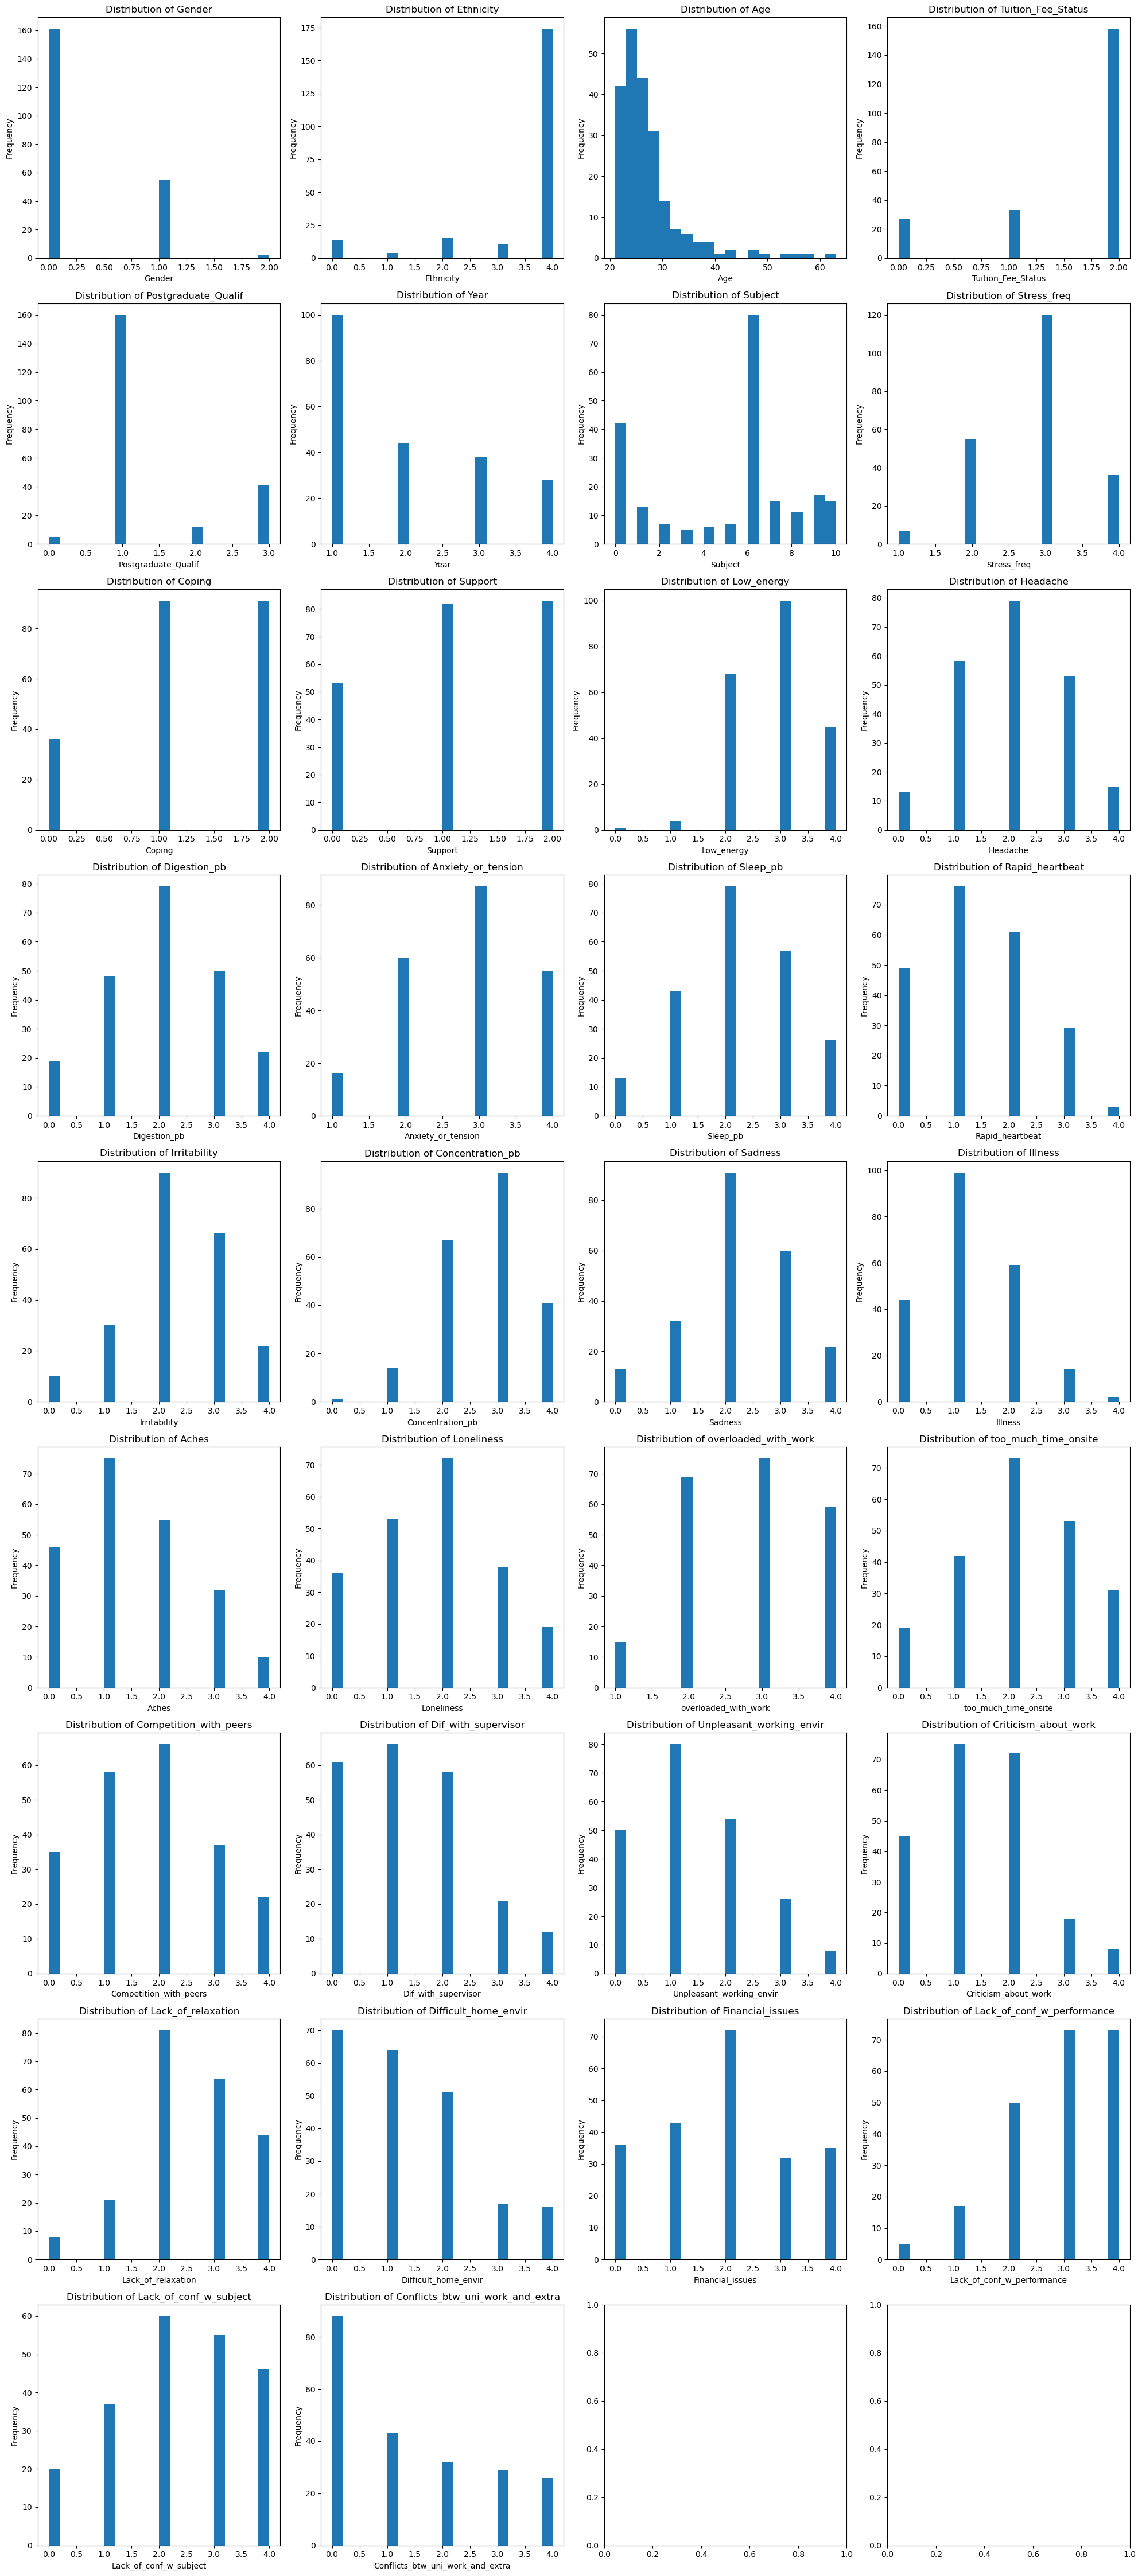

In [10]:
import matplotlib.pyplot as plt
import pandas as pd


# Get the number of columns for subplots
num_cols = len(df.columns[0:34])
nb_row=4
# Calculate the number of rows and columns for subplots
num_rows = (num_cols // nb_row) + 1  # You can adjust the number of columns per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=nb_row, figsize=(20, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df.columns[0:34]):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


# How does academic stress vary among students across different academic levels  and majors, and from different ethnicities?

In [11]:
stress_freq_mean_by_year = sheet2_df.groupby('Year')['Stress_freq'].mean()
stress_freq_mean_by_year

Year
1.0    2.860000
2.0    2.818182
3.0    2.815789
4.0    2.964286
Name: Stress_freq, dtype: float64

the year isn't a factor that influence a lot the level of stress that students could experience, because the mean is pretty close for each year. However, there is still a little difference for the students in year 4 who seem to experience stress more often than the other years of study.

In [12]:
stress_freq_mean_by_subject = sheet2_df.groupby('Subject')['Stress_freq'].mean()
stress_freq_mean_by_subject

Subject
0     2.785714
1     2.615385
2     2.571429
3     3.000000
4     2.833333
5     3.142857
6     2.950000
7     3.066667
8     2.545455
9     2.647059
10    2.866667
Name: Stress_freq, dtype: float64

In [13]:
stress_freq_mean_by_ethnicity = sheet2_df.groupby('Ethnicity')['Stress_freq'].mean()
stress_freq_mean_by_ethnicity

Ethnicity
0    2.714286
1    3.500000
2    2.933333
3    3.000000
4    2.827586
Name: Stress_freq, dtype: float64

# Scaling

# Finding the coping mechanisms that work the best

**Counting the coping mechanisms that have the most 'yes' answers to the question : 'Do you feel that your coping mechanisms help to manage or relieve stress successfully?'**

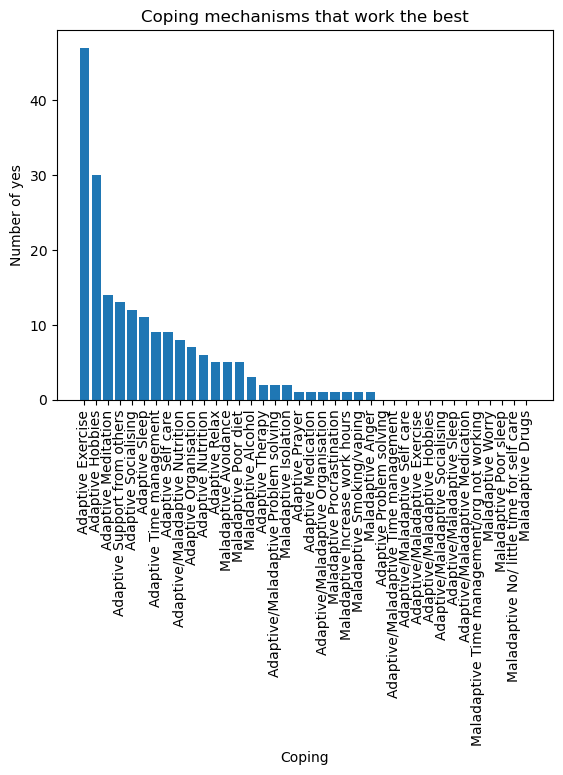

<Figure size 640x480 with 0 Axes>

In [14]:
#df.head()
working_copings = {}
for column in df.columns[34:]:
    working_copings[column] = 0
#print(df.columns[34:])    
#print(df['Coping'])
for column in df.columns[34:]:
    for i in range(0, df.shape[0]-1):
        if int(df['Coping'][i]) == 2 and df[column][i] == 1.0:
            #print(str(i)+"  "+column)
            working_copings[column] = working_copings[column] + 1

sorted_working_copings = dict(sorted(working_copings.items(), key=lambda x:x[1], reverse=True))

#print(sorted_working_copings)
# Extraire les clés et les valeurs du dictionnaire
keys = list(sorted_working_copings.keys())
values = list(sorted_working_copings.values())

plt.bar(keys, values)

plt.title('Coping mechanisms that work the best')
plt.xlabel('Coping')
plt.ylabel('Number of yes')
plt.xticks(rotation='vertical')
plt.show()
plt.savefig("coping.png")


**Classification of the coping mechanisms according to if they work well or not**

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support


# Convert categorical values in 'Coping' to numerical labels
df['Coping'] = df['Coping'].map({2: 1, 1: 0, 0:0})
df.fillna(0,inplace=True)
# Select features and target variable
#features = df[df.columns[34:]]
target = df['Coping']

features = df.columns[34:]
# Extract features and target variable
X = df[features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

#performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

#performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

Model: Decision Tree
Accuracy: 0.5909090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        27
           1       0.45      0.29      0.36        17

    accuracy                           0.59        44
   macro avg       0.55      0.54      0.53        44
weighted avg       0.57      0.59      0.57        44


Model: Logistic Regression
Accuracy: 0.7045454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.70      0.41      0.52        17

    accuracy                           0.70        44
   macro avg       0.70      0.65      0.65        44
weighted avg       0.70      0.70      0.68        44


Model: Support Vector Machine
Accuracy: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
 

# Machine learning to predict mental health problems

# What are the most common symptoms associated with high stress level?

To answer this question, we will analyze the data of Q10 dataframe, which contains how often do the participants experience a list of mental health issues.

In [16]:
from pandas.plotting import scatter_matrix
import numpy as np
matrix=Q10_df.corr()
print(matrix)

                    Low_energy  Headache  Digestion_pb  Anxiety_or_tension  \
Low_energy            1.000000  0.260691      0.226707            0.391232   
Headache              0.260691  1.000000      0.260939            0.146903   
Digestion_pb          0.226707  0.260939      1.000000            0.227451   
Anxiety_or_tension    0.391232  0.146903      0.227451            1.000000   
Sleep_pb              0.337125  0.183386      0.166727            0.327103   
Rapid_heartbeat       0.262655  0.287740      0.194374            0.372897   
Irritability          0.357727  0.219781      0.222286            0.360175   
Concentration_pb      0.380487  0.163710      0.044697            0.256137   
Sadness               0.437698  0.247979      0.221031            0.509363   
Illness               0.253634  0.333825      0.336826            0.267639   
Aches                 0.322407  0.291098      0.230163            0.326177   
Loneliness            0.292494  0.149919      0.199142          

<Axes: >

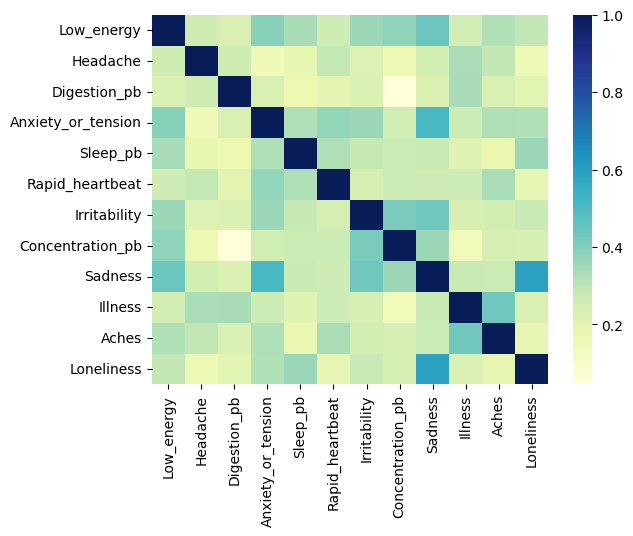

In [17]:
import seaborn as sns
sns.heatmap(matrix,cmap='YlGnBu')

**Hierarchical clustering dendrogram**

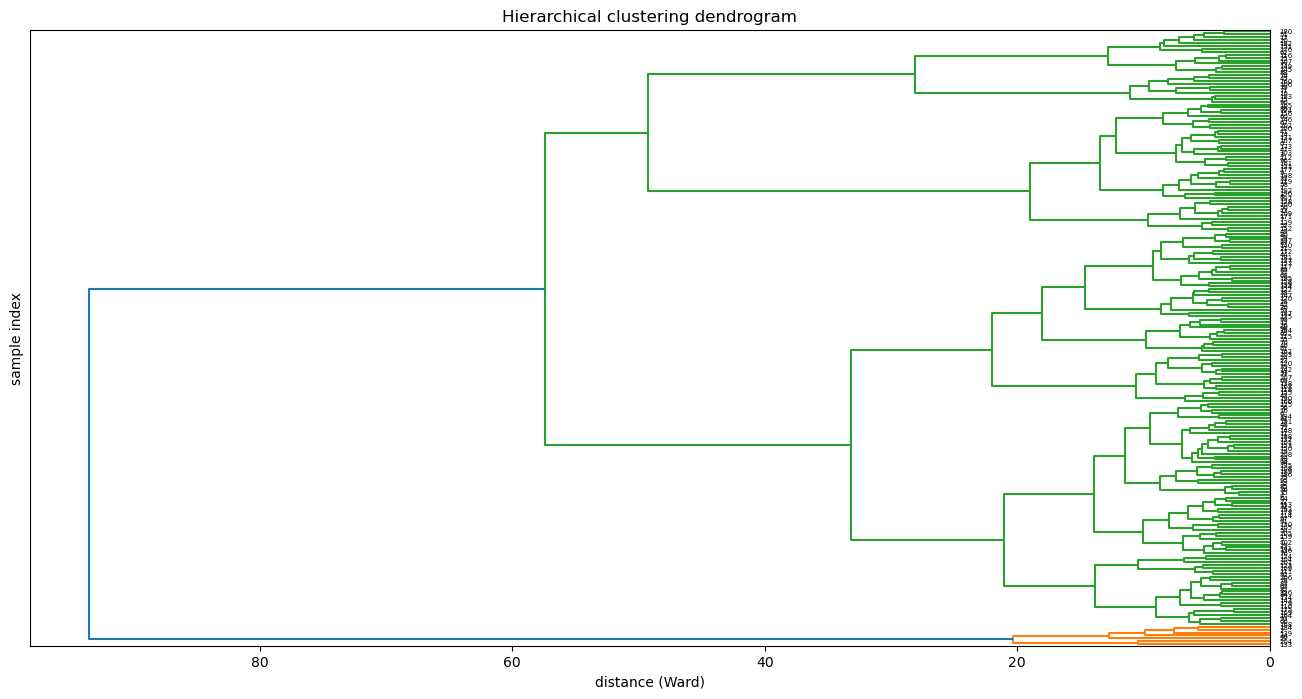

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

df2=pd.concat([sheet2_df, Q10_df], axis=1)
df2=df2.dropna()
df_dend = df2.set_index('Stress_freq')
df_dend = df_dend.reset_index(drop=True)
df.head()

Z = linkage(df_dend,'ward')

plt.figure(figsize=(16,8))
plt.title('Hierarchical clustering dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance (Ward)')

dendrogram(Z,labels=df_dend.index,orientation='left')

plt.show()

**Classification algorithm to predict whether an individual is likely to experience high stress based on their reported symptoms**

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define features (symptoms) and target variable (stress frequency)
features = ['Low_energy', 'Headache', 'Digestion_pb', 'Anxiety_or_tension', 'Sleep_pb', 'Rapid_heartbeat',
            'Irritability', 'Concentration_pb', 'Sadness', 'Illness', 'Aches', 'Loneliness']

target = 'Stress_freq'  # Replace with the actual column name for stress frequency

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier (you can choose other classifiers based on your preference)
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           2       0.86      0.50      0.63        12
           3       0.61      0.87      0.71        23
           4       0.50      0.22      0.31         9

    accuracy                           0.64        44
   macro avg       0.65      0.53      0.55        44
weighted avg       0.65      0.64      0.61        44



**PCA**:

Principal Component Analysis (PCA) is a technique used for dimensionality reduction and feature extraction. It can help in capturing the most important patterns or relationships in your data by transforming the original features into a new set of uncorrelated features, called principal components.

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = Q10_df

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of principal components
n_components = 6  # Adjust as needed

# Perform PCA
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Concatenate the principal components with the original DataFrame
#result_df = pd.concat([df, pc_df], axis=1)

# Print the explained variance ratio to see how much variance is explained by each component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.343552   0.10765763 0.08189775 0.07156623 0.0669143  0.06239517]


In [21]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#import the breast _cancer dataset

df.keys()
 

# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(df)
x=principal.transform(df)
 
# Check the dimensions of data after PCA
print(x.shape)

(218, 3)


[0.48010308 0.11906627 0.08309311]


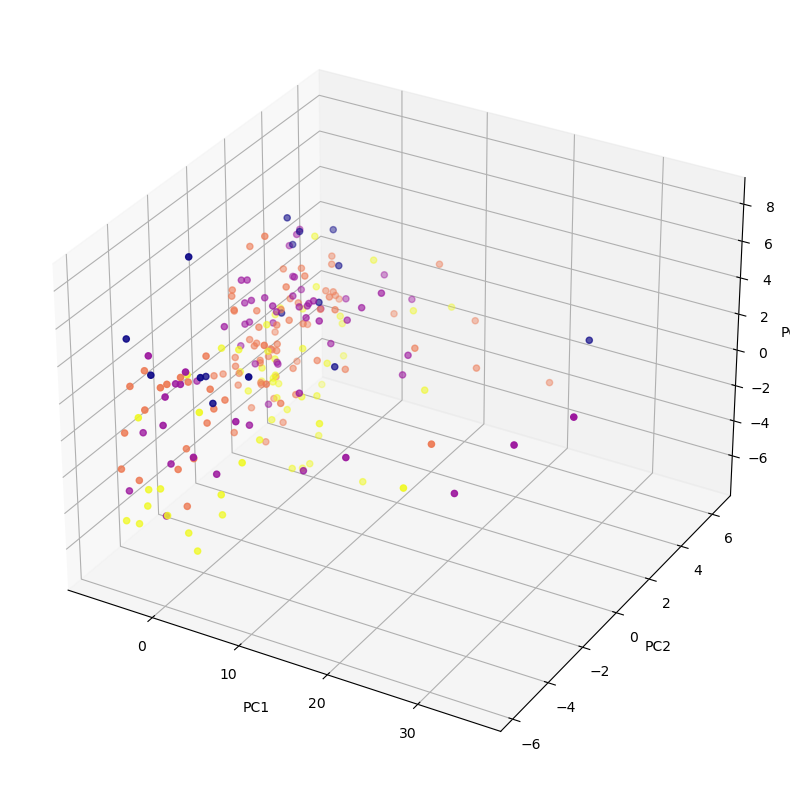

In [22]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=df['Anxiety_or_tension'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)